In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import visualkeras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'dataset/train'
test_dir = 'dataset/test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)
print("Class indices:", train_generator.class_indices)

print("Classes:", train_generator.classes)

Found 106 images belonging to 10 classes.
Found 106 images belonging to 10 classes.
Class indices: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
Classes: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6
 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]


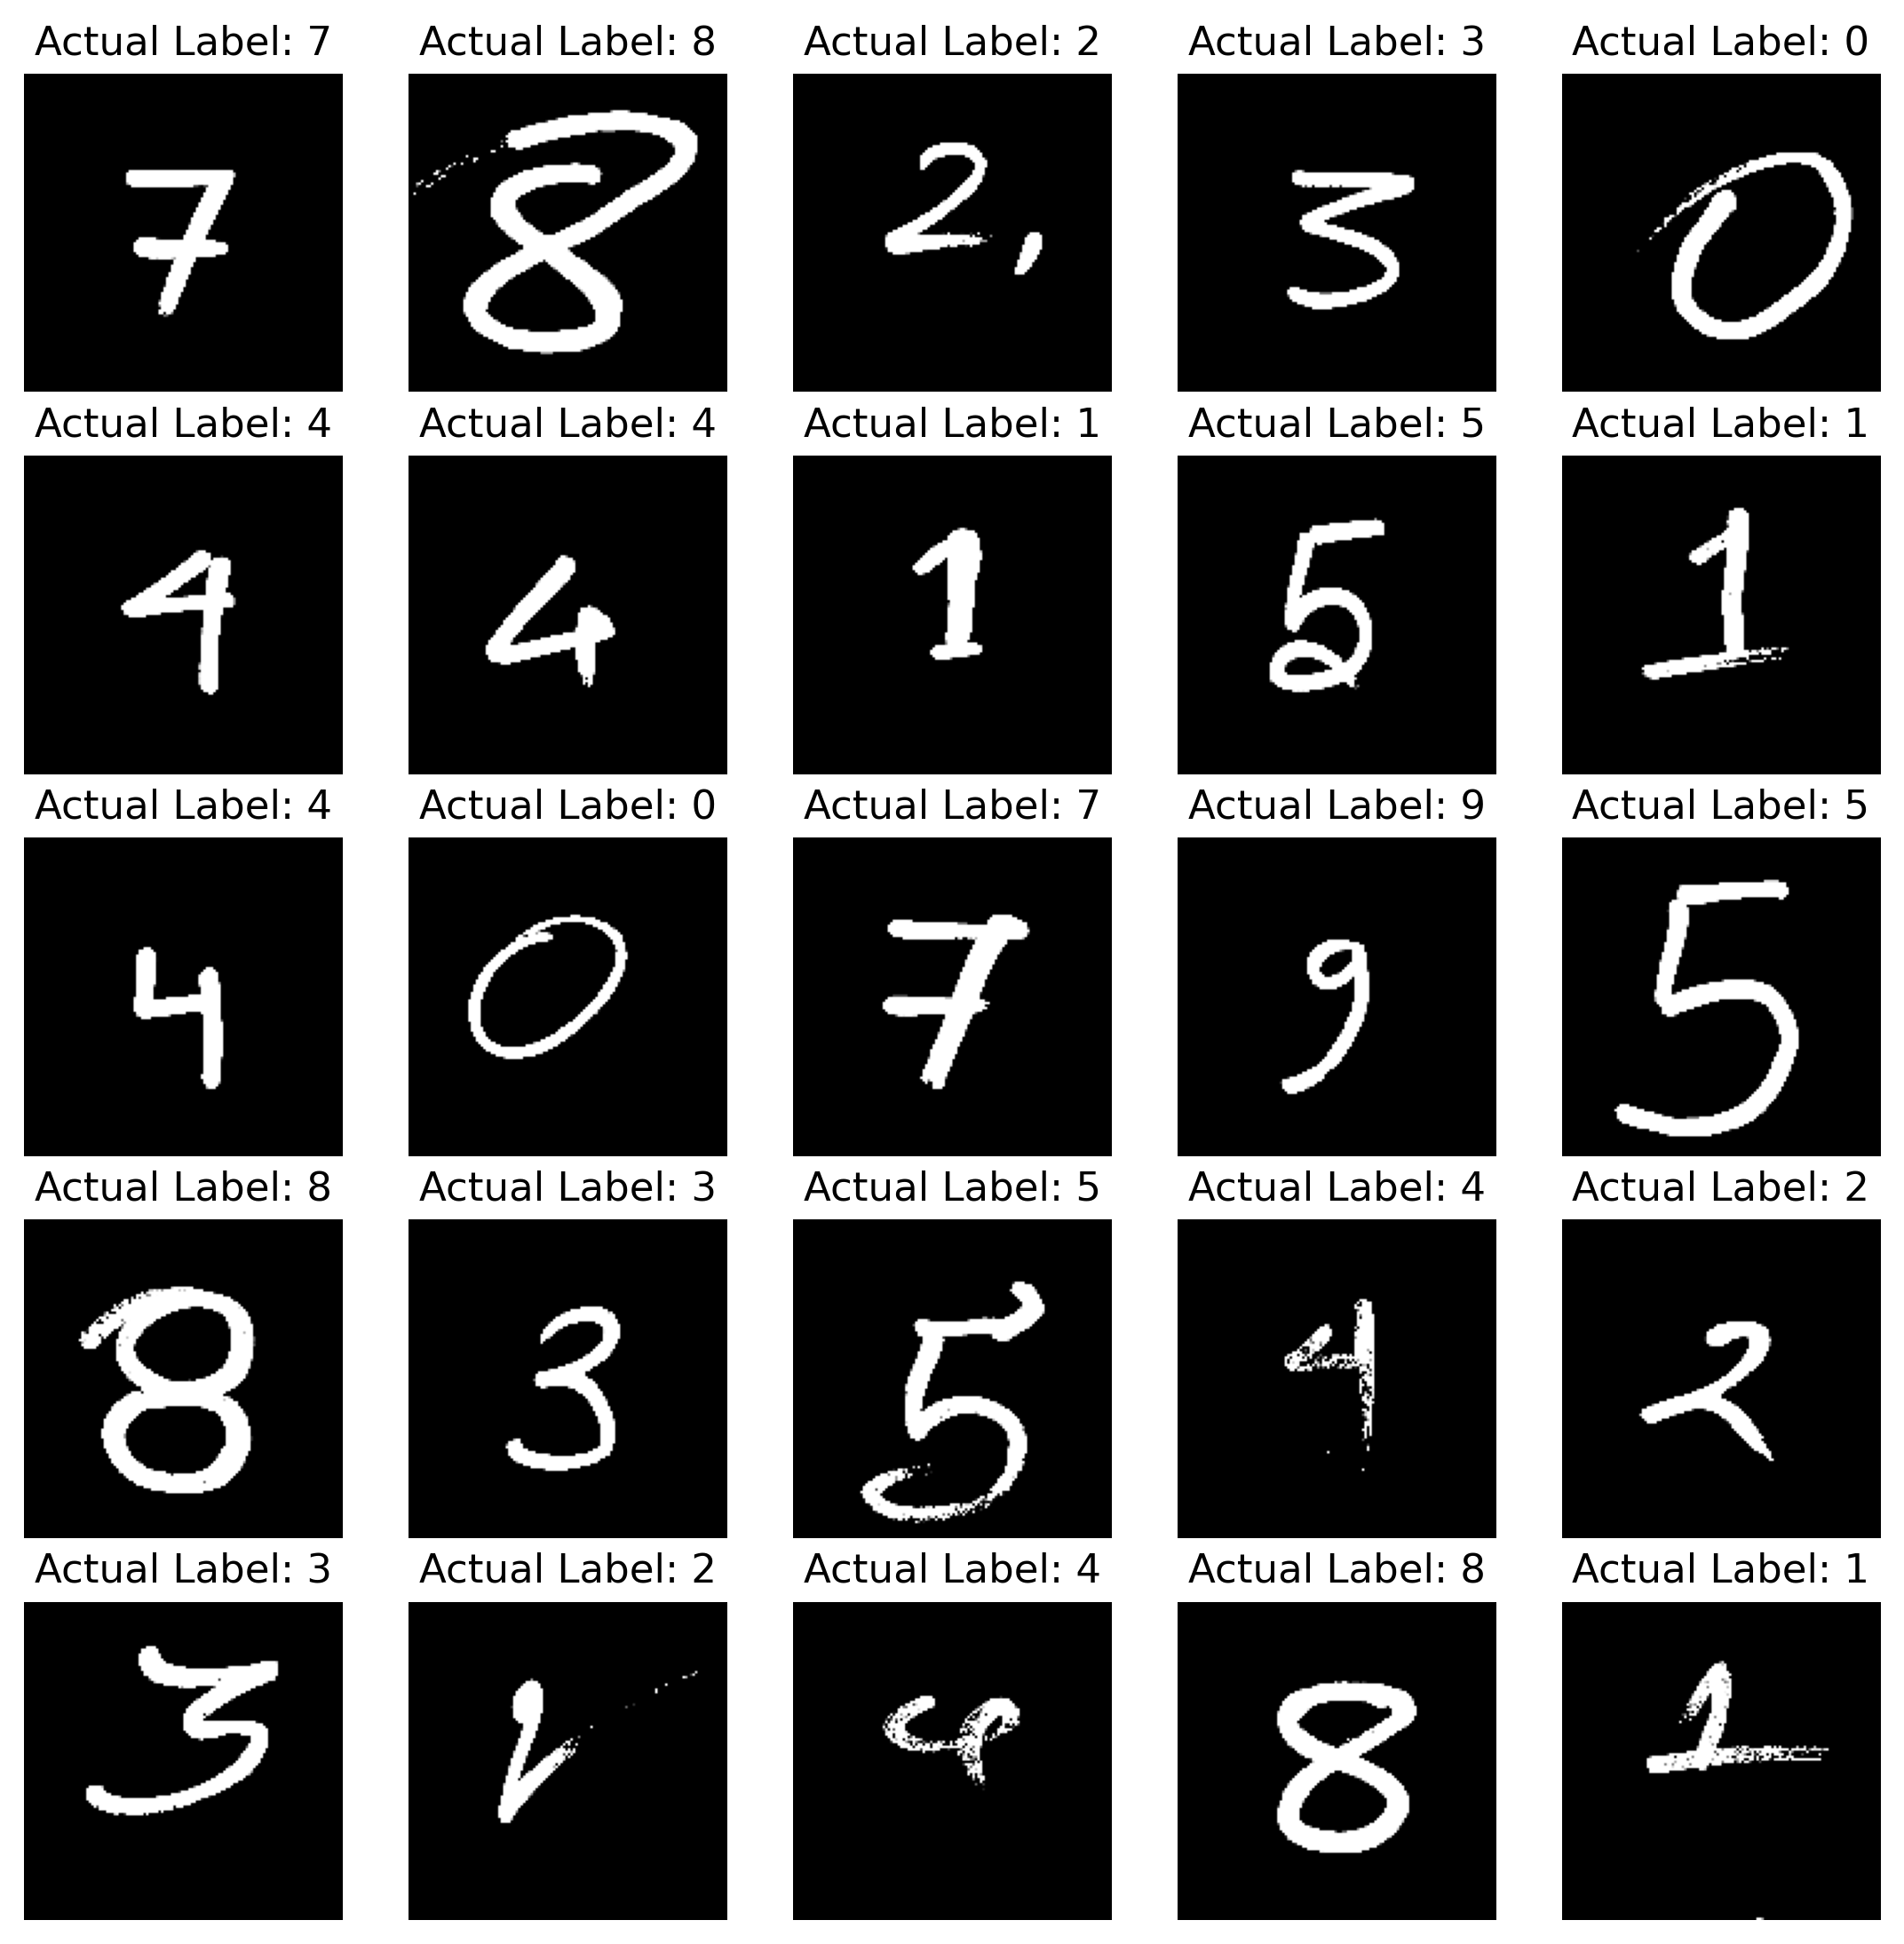

In [22]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)

plt.figure(figsize=(10, 10), dpi=270)
for i in range(min(25, len(images))):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].reshape(128, 128), cmap='gray')
    plt.title(f"Actual Label: {labels[i].argmax()}")
    plt.axis('off')
plt.show()

In [23]:
def plot_training_history_with_plotly(history):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['accuracy']) + 1)),
        y=history.history['accuracy'],
        mode='lines',
        name='Train Accuracy'
    ))

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['val_accuracy']) + 1)),
        y=history.history['val_accuracy'],
        mode='lines',
        name='Validation Accuracy'
    ))

    fig.update_layout(
        title='Model Accuracy',
        xaxis_title='Epoch',
        yaxis_title='Accuracy',
        legend=dict(x=0, y=1),
    )

    fig.show()

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['loss']) + 1)),
        y=history.history['loss'],
        mode='lines',
        name='Train Loss'
    ))

    fig.add_trace(go.Scatter(
        x=list(range(1, len(history.history['val_loss']) + 1)),
        y=history.history['val_loss'],
        mode='lines',
        name='Validation Loss'
    ))

    fig.update_layout(
        title='Model Loss',
        xaxis_title='Epoch',
        yaxis_title='Loss',
        legend=dict(x=0, y=1),
    )

    fig.show()

In [24]:
train_images = images.reshape((-1, 128, 128, 1)).astype('float32') / 255
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(labels)

In [25]:
images, labels = next(train_generator)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Images shape: (32, 128, 128, 1)
Labels shape: (32, 10)


In [26]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\sansk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 124, 124, 6)         │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 58, 58, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 29, 29, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 13456)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 120)                 │       1,614,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,628,426 (6.21 MB)

 Trainable params: 1,628,426 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\sansk\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning:

The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.



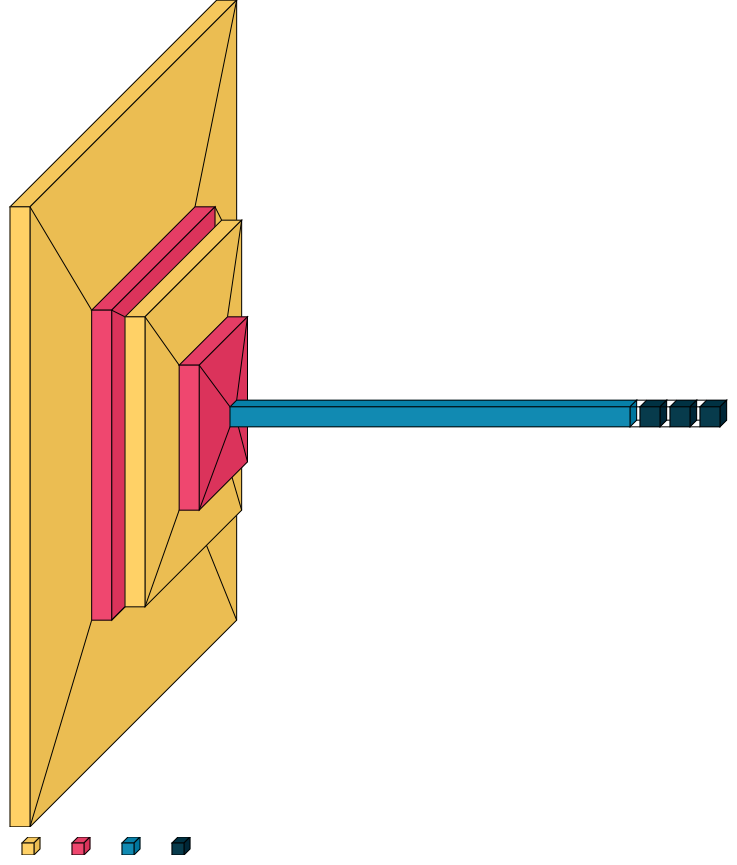

In [27]:
visualkeras.layered_view(model, scale_xy=5, legend=True)

In [28]:
history = model.fit(train_generator, epochs=10, batch_size=64,validation_data=test_generator)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
num_training_samples = train_generator.samples
print(f"Number of training samples: {num_training_samples}")
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")

Epoch 1/10
2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1797 - loss: 2.2982

C:\Users\sansk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.1593 - loss: 2.2917 - val_accuracy: 0.5472 - val_loss: 1.8997
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5540 - loss: 1.8044 - val_accuracy: 0.7170 - val_loss: 1.1646
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6936 - loss: 1.0897 - val_accuracy: 0.7830 - val_loss: 0.6292
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7360 - loss: 0.6174 - val_accuracy: 0.8868 - val_loss: 0.3851
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8848 - loss: 0.4283 - val_accuracy: 0.9340 - val_loss: 0.1768
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9120 - loss: 0.2529 - val_accuracy: 0.9717 - val_loss: 0.1137
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9609 - loss: 0.1165 - val_accuracy: 0.9811 - val_loss: 0.1132
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9734 - loss: 0.1214 - val_accuracy: 0.9906 - val_loss: 0.0355
Epoch 9/10

In [29]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0198
Test accuracy: 1.0


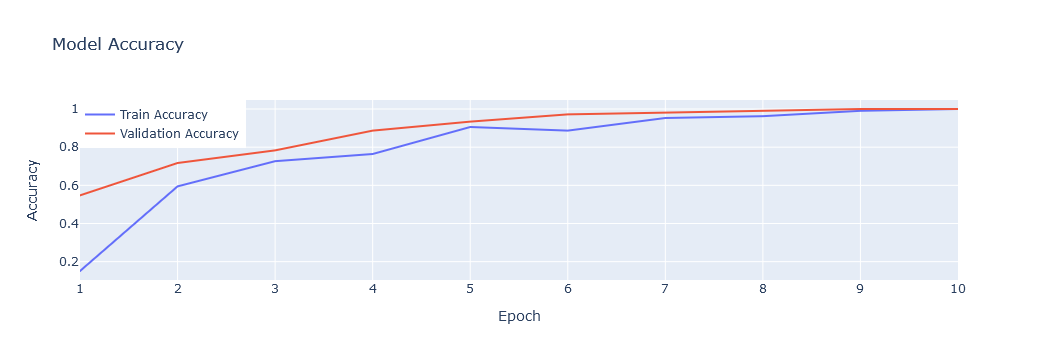

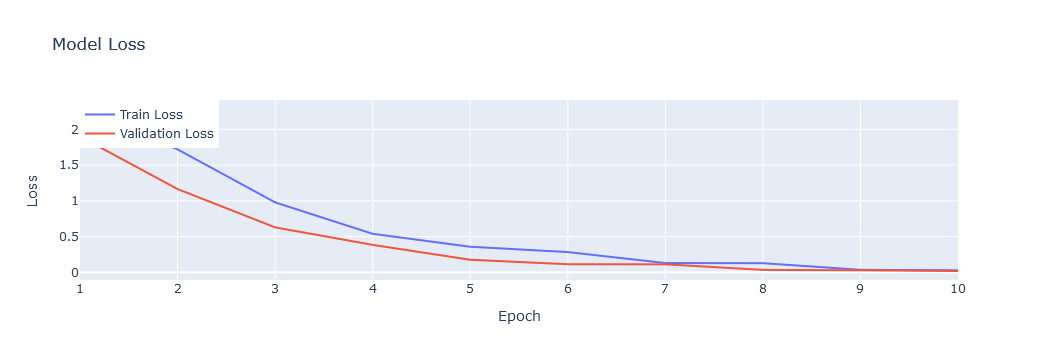

In [30]:
plot_training_history_with_plotly(history)

In [32]:
predictions = model.predict(test_generator)
print(f'Test accuracy: {test_acc}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Test accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


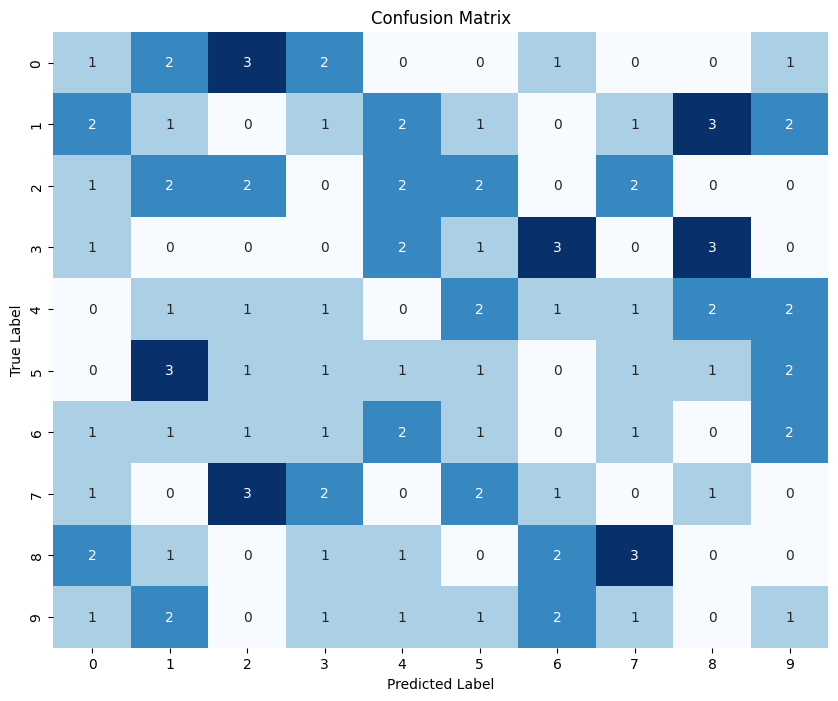


Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.10      0.10        10
           1       0.08      0.08      0.08        13
           2       0.18      0.18      0.18        11
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        11
           5       0.09      0.09      0.09        11
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.10      0.10      0.10        10

    accuracy                           0.06       106
   macro avg       0.05      0.05      0.05       106
weighted avg       0.06      0.06      0.06       106



In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
true_labels = test_generator.classes
predictions = []
for batch_images, _ in test_generator:
    batch_preds = model.predict(batch_images)
    predictions.extend(batch_preds)
    if len(predictions) >= len(true_labels):
        break
predictions = np.array(predictions[:len(true_labels)])
predicted_labels = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print('\nClassification Report:\n', classification_report(true_labels, predicted_labels))

In [34]:
# Model 1: CNN
model_1 = keras.Sequential([
    layers.Input(shape=(128, 128, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Model 2: Deeper CNN
model_2 = keras.Sequential([
    layers.Input(shape=(128, 128, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [35]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
history_1 = model_1.fit(train_generator, epochs=10, validation_data=test_generator)
history_2 = model_2.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 296ms/step - accuracy: 0.1934 - loss: 2.3324 - val_accuracy: 0.8868 - val_loss: 0.8931
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - accuracy: 0.8797 - loss: 0.7878 - val_accuracy: 0.9528 - val_loss: 0.3085
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - accuracy: 0.9435 - loss: 0.2824 - val_accuracy: 0.9906 - val_loss: 0.0993
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - accuracy: 0.9941 - loss: 0.0814 - val_accuracy: 1.0000 - val_loss: 0.0275
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 1.0000 - loss: 0.0255 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step - accuracy: 1.0000 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss:

In [38]:
test_loss_1, test_accuracy_1 = model_1.evaluate(test_generator)
test_loss_2, test_accuracy_2 = model_2.evaluate(test_generator)
print(f"Model 1 Accuracy: {test_accuracy_1:.4f}")
print(f"Model 2 Accuracy: {test_accuracy_2:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 5.4423e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0010
Model 1 Accuracy: 1.0000
Model 2 Accuracy: 1.0000


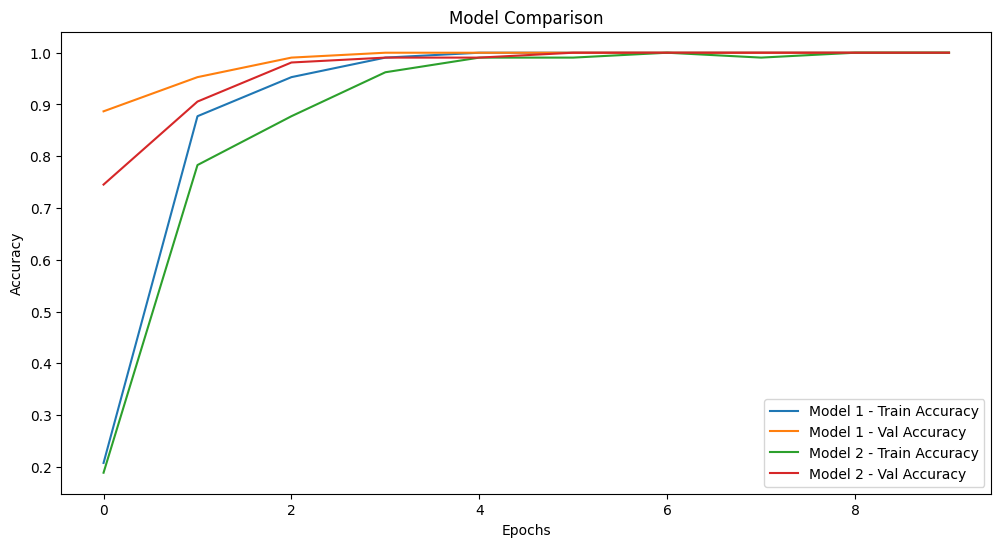

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['accuracy'], label='Model 1 - Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Model 1 - Val Accuracy')
plt.plot(history_2.history['accuracy'], label='Model 2 - Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Model 2 - Val Accuracy')
plt.title('Model Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
model.fit(train_generator, epochs=10, batch_size=64,validation_data=test_generator)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 1.0000 - loss: 9.7616e-04 - val_accuracy: 1.0000 - val_loss: 7.2397e-04
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 1.0000 - loss: 7.6157e-04 - val_accuracy: 1.0000 - val_loss: 6.6470e-04
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 1.0000 - loss: 5.7481e-04 - val_accuracy: 1.0000 - val_loss: 6.1450e-04
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 5.0244e-04 - val_accuracy: 1.0000 - val_loss: 5.6554e-04
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 1.0000 - loss: 9.1589e-04 - val_accuracy: 1.0000 - val_loss: 5.3482e-04
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 1.0000 - loss: 4.3578e-04 - val_accuracy: 1.0000 - val_loss: 5.4420e-04
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 1.0000 - loss: 3.9983e-04 - val_accuracy: 1.0000 - val_loss: 5.2161e-04
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 1.0000 -

In [42]:
model.save('sherlokholmes.keras')